In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
import tensorflow.compat.v1 as tf
#For Compatibility with older code.
tf.disable_eager_execution()

In [15]:
from sklearn.datasets import *
from sklearn.preprocessing import minmax_scale

In [16]:
features,target = make_blobs(n_samples = 500,n_features=2,centers=2,random_state=75,cluster_std = 5)

In [17]:
features = minmax_scale(features)
k = int(len(features)*0.6)

In [18]:
X_train,Y_train = features[0:k,:],target[0:k]
X_test,Y_test = features[k:,:],target[k:]

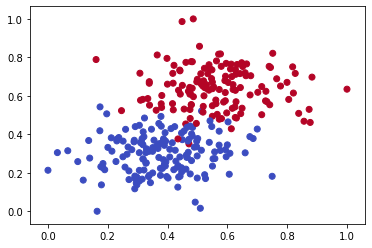

In [19]:
plt.scatter(X_train[:,0],X_train[:,1], c = Y_train, cmap = "coolwarm")
plt.show()

In [20]:
# Define data size and batch size
n_samples = 1000 
batch_size = 100
n_features = 2

(0, 1)

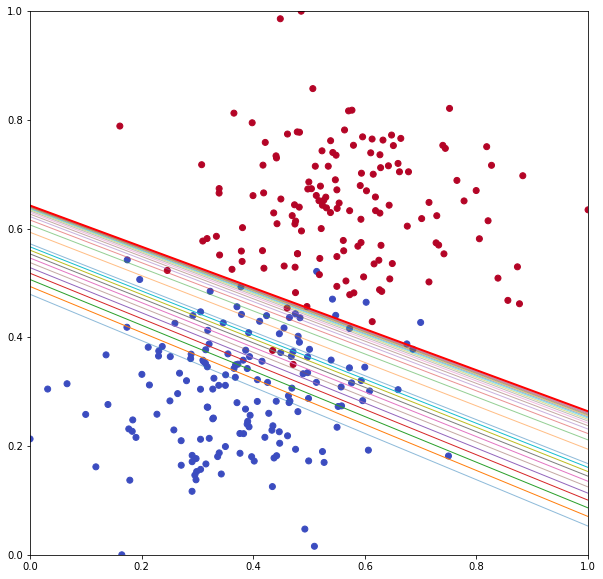

In [48]:
tf.reset_default_graph()


# Define placeholders for input
X = tf.placeholder(tf.float32, shape=(None, n_features)) 
y = tf.placeholder(tf.float32, shape=(None, 1)) 


with tf.variable_scope("linear-classifier", reuse=tf.AUTO_REUSE):
    W = tf.Variable(tf.zeros([2,1]))

    b = tf.Variable(tf.zeros([1]))
    
    #inner = tf.add(tf.matmul(X, W),b)
    inner = tf.add(tf.matmul(X, W),b)
    predictor = tf.add(tf.matmul(X, W),b)

    #y_pred = tf.nn.sigmoid(inner)


    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=inner))
    #loss = tf.reduce_mean(tf.losses.sigmoid_cross_entropy(y, y_pred))

        
 

# Sample code to run full gradient descent:
# Define optimizer operation
opt_operation = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)

loss_rec = []

f,ax = plt.subplots(figsize = (10,10))
plt.scatter(X_train[:,0],X_train[:,1], c = Y_train, cmap = "coolwarm")

with tf.Session() as sess:
# Initialize Variables in graph 
    sess.run(tf.initialize_all_variables()) 
    # Gradient descent loop for 500 steps 
    for _i in range(500):
        # Select random minibatch
        #indices = np.random.choice(len(X_train), batch_size)
        X_batch, y_batch = X_train, Y_train.reshape(-1,1)
        # Do gradient descent step
        _, loss_val = sess.run([opt_operation, loss], feed_dict={X: X_batch, y: y_batch})
        Weight = sess.run(W) # Optimized Weight 
        Bias = sess.run(b)
        loss_rec.append(np.mean(loss_val))

        Weight_X1,Weight_X2 = Weight
        B = Bias[0]
        
        def linear_disc(x1,wx1,wx2,bias):
            return (-wx1*x1 + (-bias))/(wx2)


        g = np.linspace(0,1,10)
        gp = linear_disc(g,Weight_X1[0],Weight_X2[0],B)
        
        
        
        if _i % 25 == 0:
            plt.plot(g,gp, linewidth = 1, alpha = 0.5)
        elif _i < 50:
            if _i % 5 == 0:
                plt.plot(g,gp, linewidth = 1)
        
plt.plot(g,gp, linewidth = 2, alpha = 1, c = 'r')
plt.xlim([0,1])
plt.ylim([0,1])

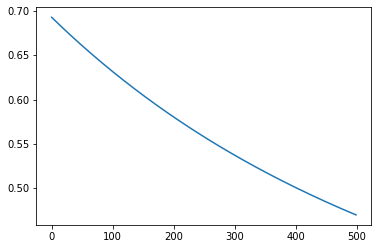

In [49]:
plt.plot(range(len(loss_rec)),loss_rec)

In [50]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables()) 
    w = sess.run(W)
    predictions = sess.run(predictor, {X:X_test})

In [51]:
predictions

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [52]:
w

array([[0.],
       [0.]], dtype=float32)